In [1]:
import matplotlib.pyplot as plt 
from matplotlib import axes
import numpy as np  
from sklearn.cluster import AgglomerativeClustering
from scipy import io
from glob import glob
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# -----------------------------------------------------------------
exp_date = '2019_07_01'
fly_num = 'fly2'
main_dir = '/Users/evan/Dropbox/_AxelLab/_flygenvectors_dataShare/'
# -----------------------------------------------------------------

exp_folder = exp_date + '_' + fly_num + '/'
file_name_main = exp_date + '*' + fly_num + '.npz'

file_path_main = glob(main_dir+exp_folder+file_name_main)[0]
mat_contents = np.load(file_path_main)
dFF = np.squeeze(mat_contents['dFF'])
time = np.squeeze(mat_contents['time'])

motionThreshold = 10 # signal this large is probably artifact
mx = np.amax(dFF,axis=1)
motionFlag = mx<motionThreshold
dFF = dFF[motionFlag,:]

nClust = 20
cluster = AgglomerativeClustering(n_clusters=nClust, affinity='euclidean', linkage='ward')  
# cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=1.0)  
cluster.fit_predict(dFF)  
idx = np.argsort(cluster.labels_)

io.savemat(exp_date + '_' + fly_num + '_clust.mat',{'clust':cluster.labels_,'idx':idx})


0 

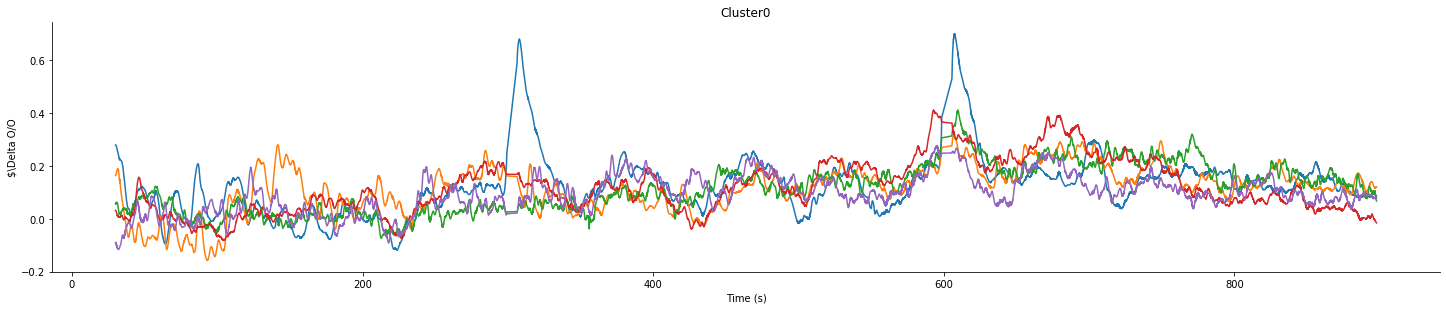

1 

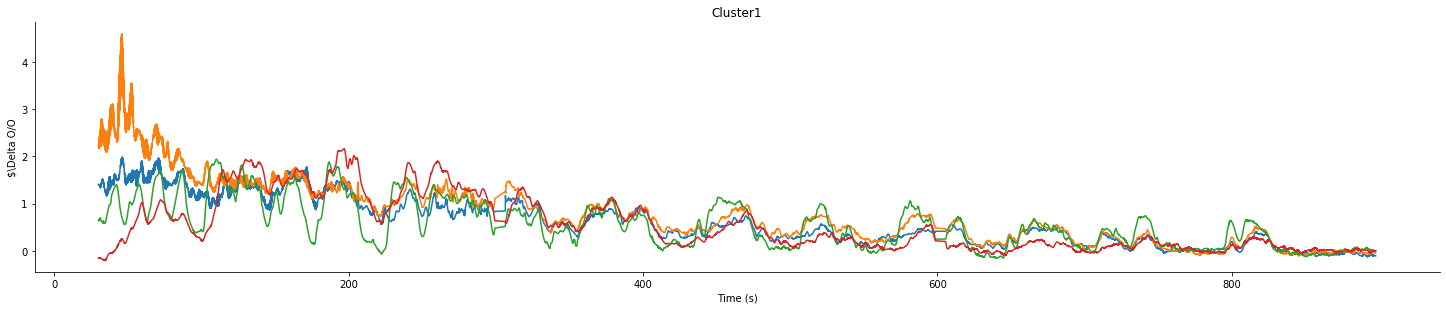

2 

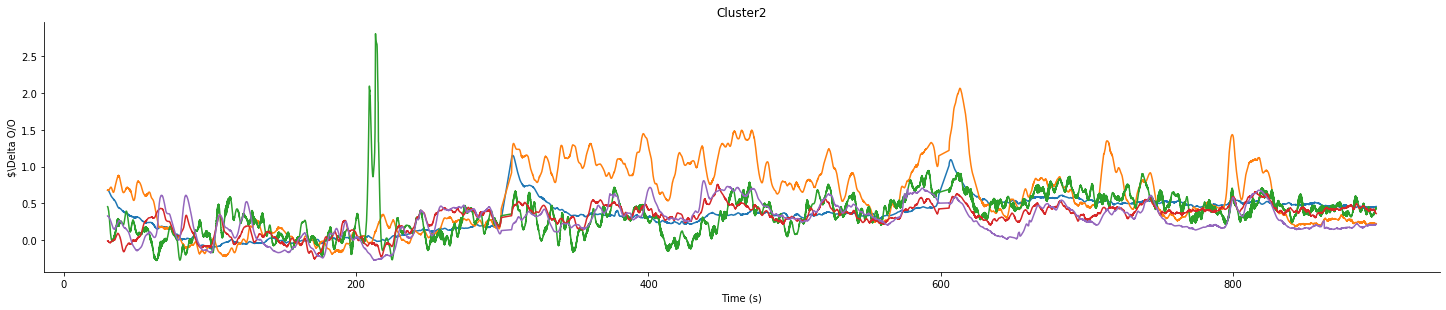

3 

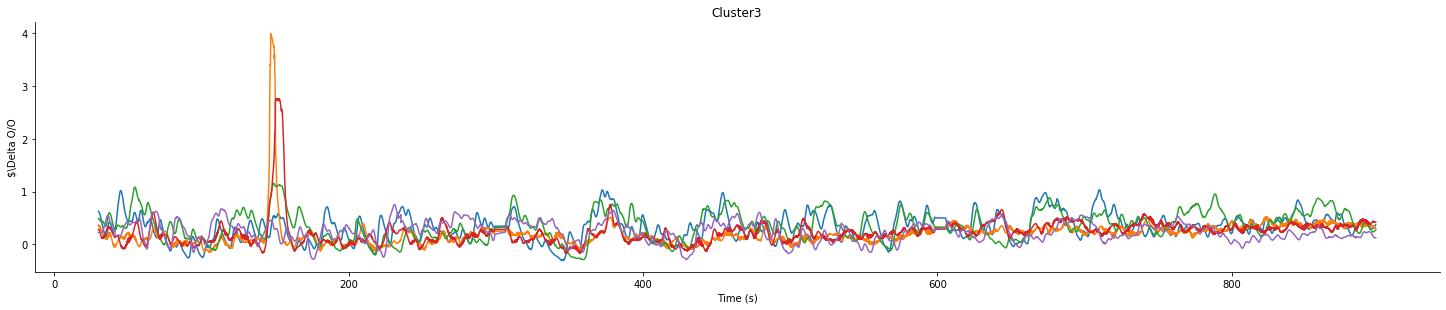

4 

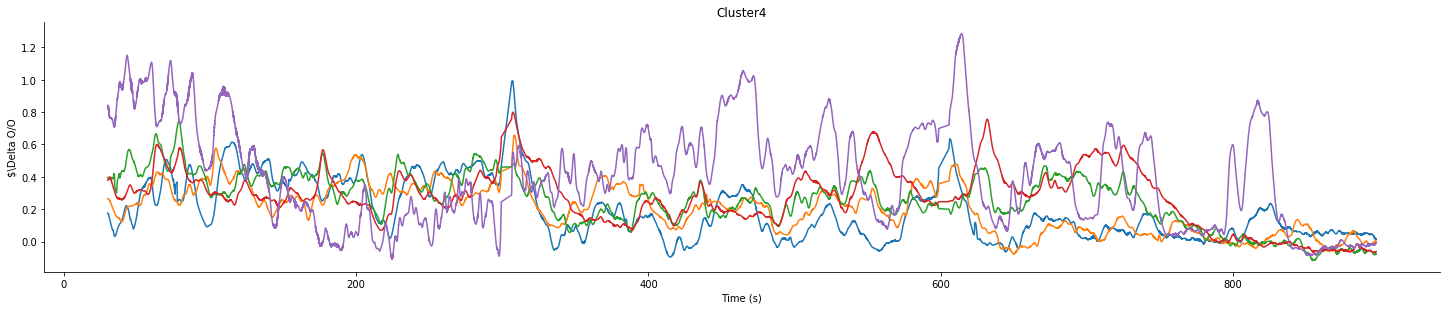

5 

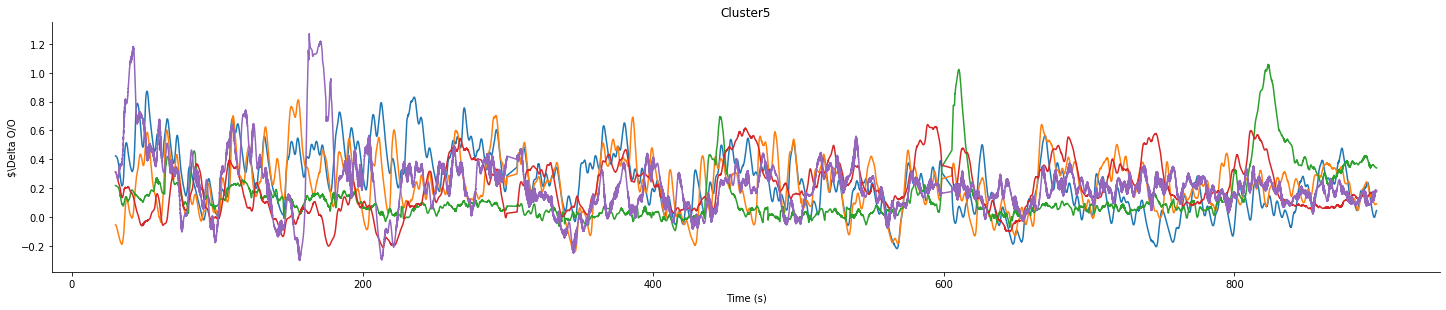

6 

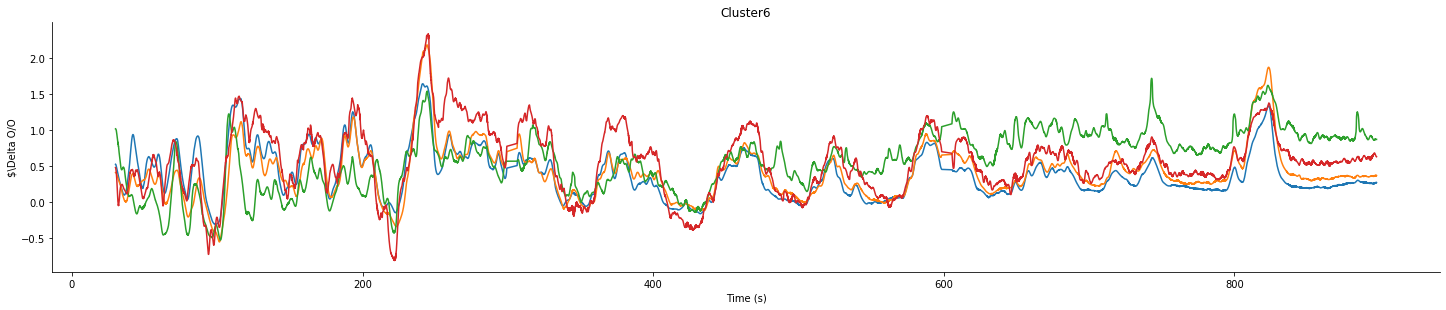

7 

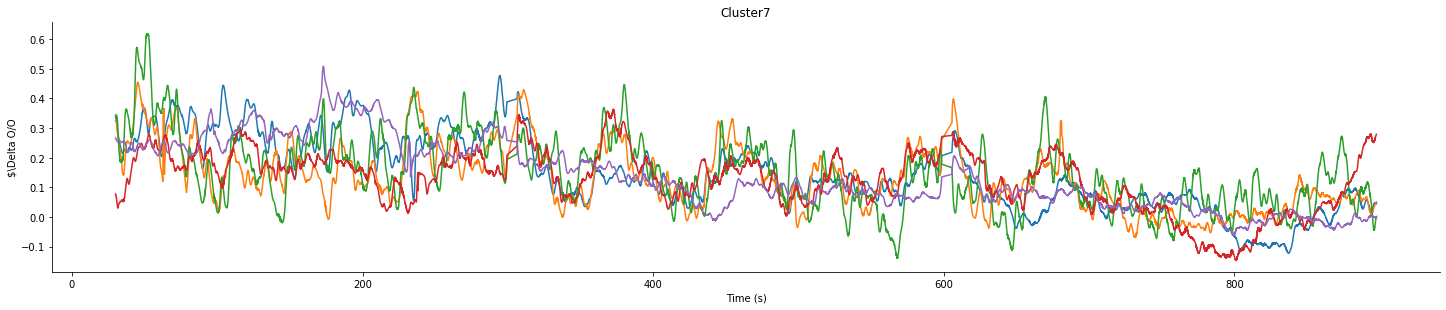

8 

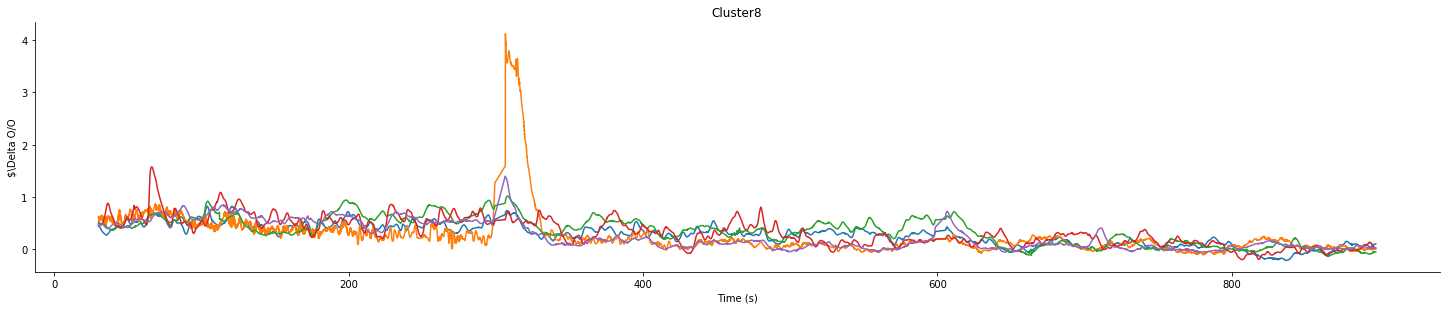

9 

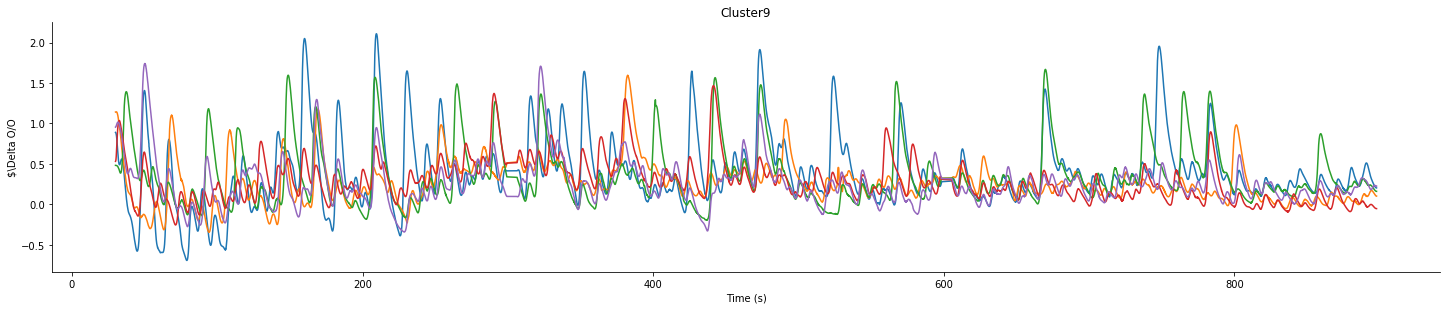

10 

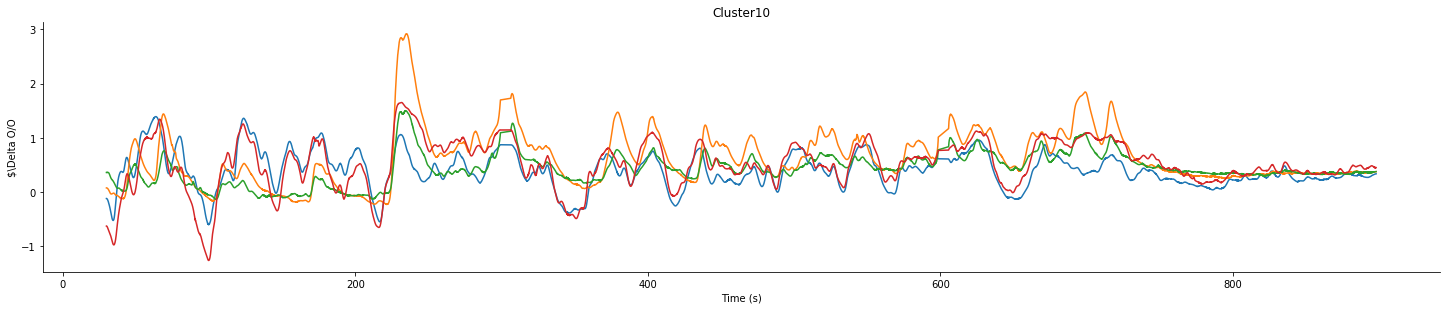

11 

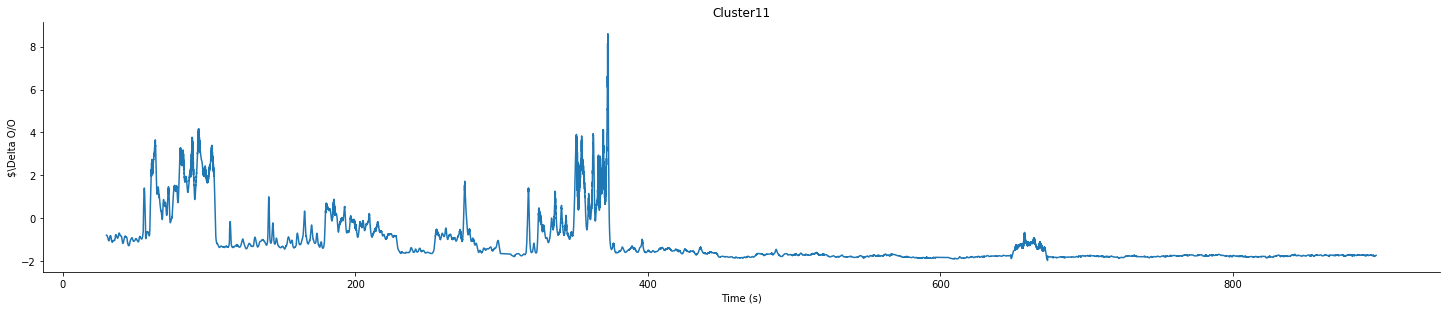

12 

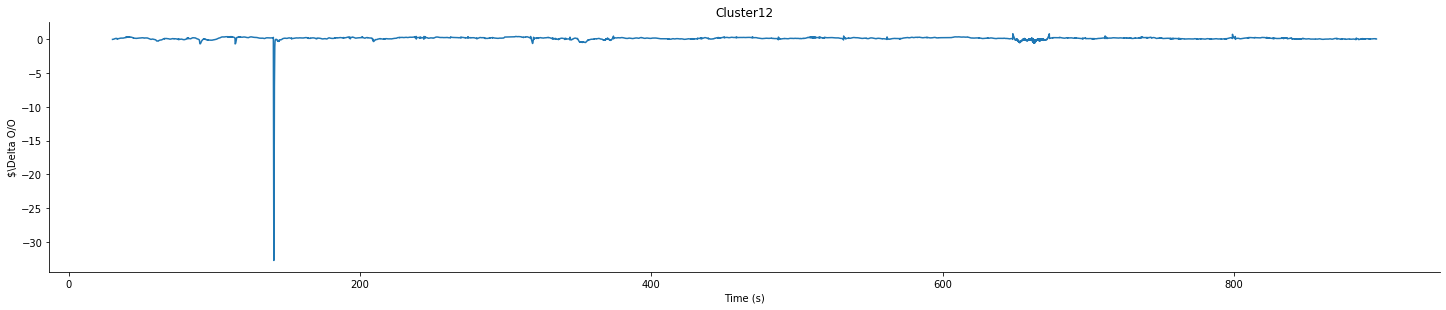

13 

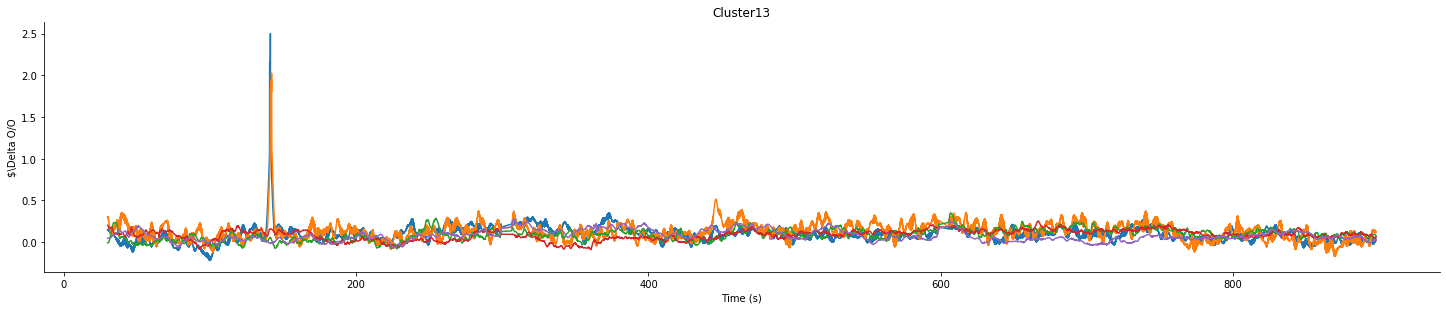

14 

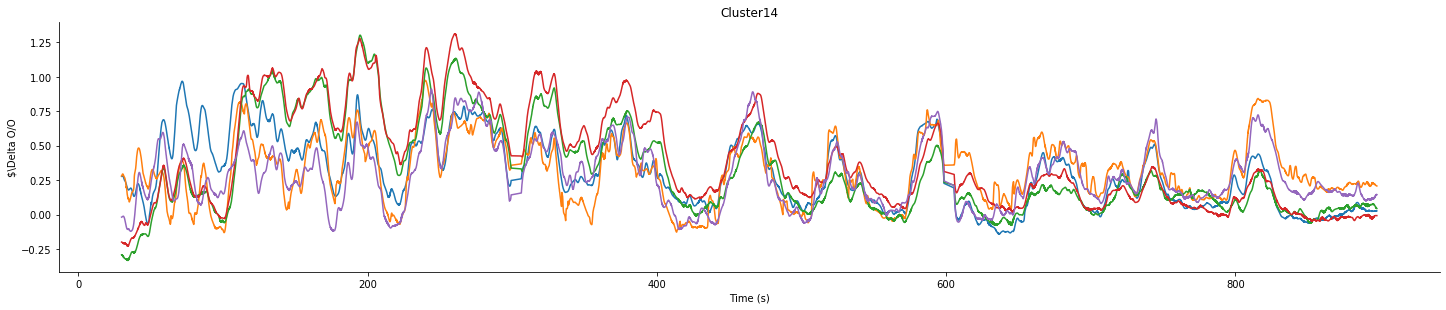

15 

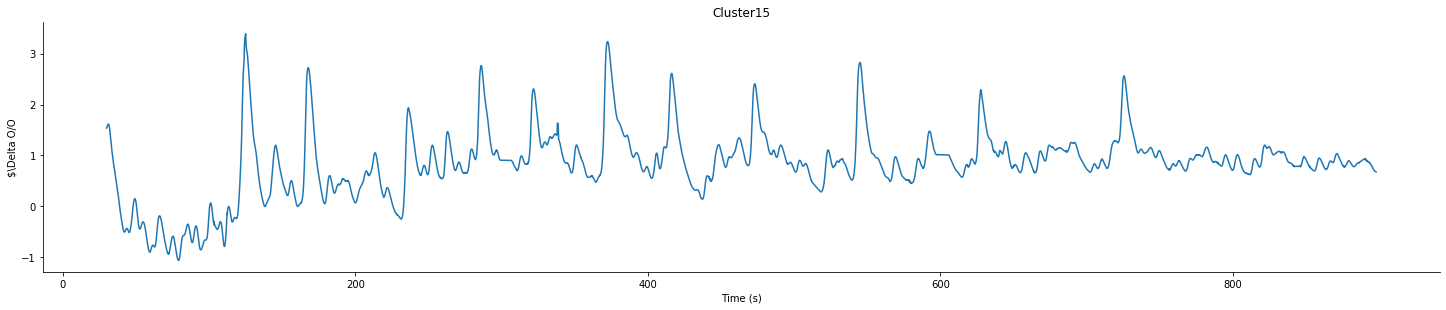

16 

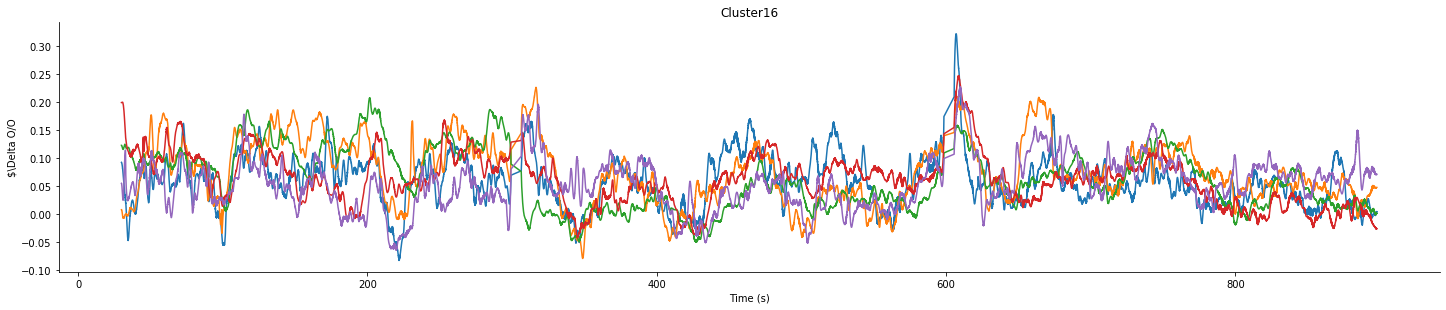

17 

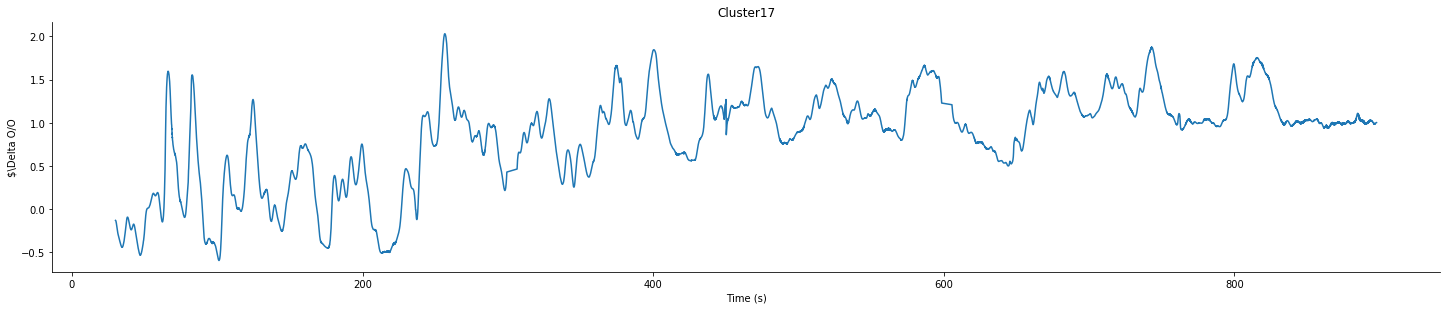

18 

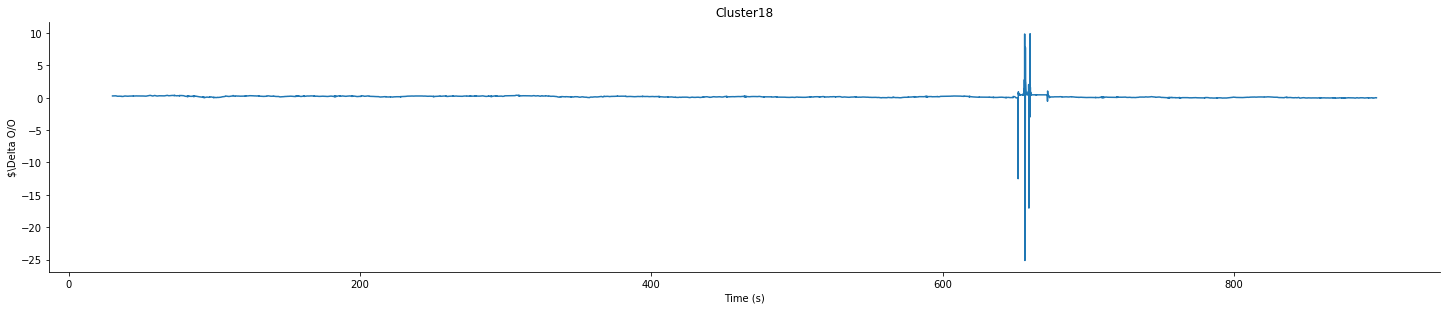

19 

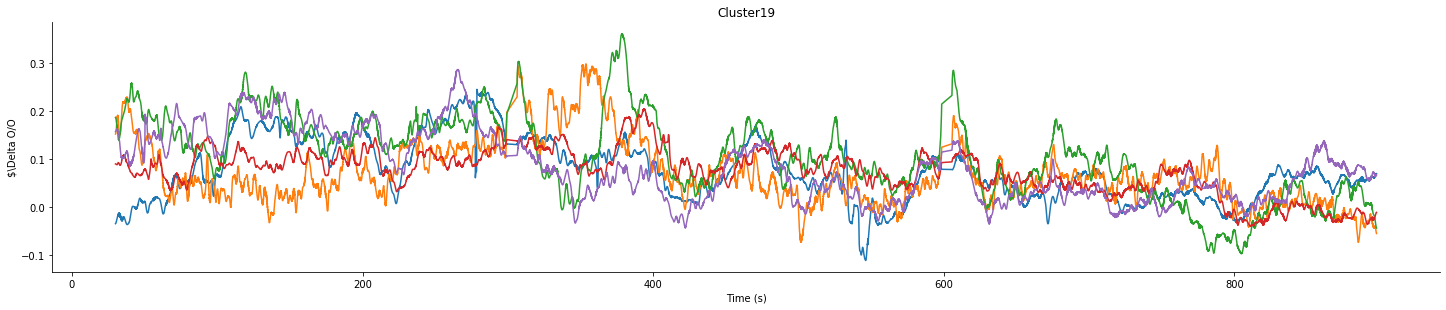

In [23]:
nToPlot = 5
for k in range(nClust):
    print(k, end=' ')
    cIds = [i for i,j in enumerate(cluster.labels_) if j==k]
    plotMx = np.min((nToPlot,len(cIds)))
    
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.plot(time, dFF[cIds[:plotMx],:].T)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()

    plt.xlabel('Time (s)')
    plt.ylabel('$\Delta O/O$')
    plt.title('Cluster'+str(k))
    plt.savefig('/Users/evan/Downloads/cluster_'+str(k)+'.pdf',transparent=True)
    plt.show()


In [10]:
time = np.squeeze(mat_contents['time'])

In [11]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')


In [19]:
from matplotlib import axes


Text(0, 0.5, '$\\Delta O/O$')

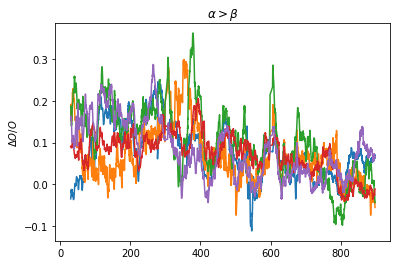

In [33]:
plt.plot(time, dFF[cIds[:plotMx],:].T)
plt.title(r'$\alpha > \beta$')
plt.ylabel(r'$\Delta O/O$')